## Brain tumor predictions

Dataset downloaded from https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

In [3]:
tf.__version__

'2.10.1'

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
metadata = pd.read_csv('metadata_rgb_only.csv')

In [6]:
metadata.head()

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
2,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
3,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
4,5,Cancer (100).jpg,tumor,JPEG,RGB,"(512, 512, 3)"


In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4461 entries, 0 to 4460
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4461 non-null   int64 
 1   image       4461 non-null   object
 2   class       4461 non-null   object
 3   format      4461 non-null   object
 4   mode        4461 non-null   object
 5   shape       4461 non-null   object
dtypes: int64(1), object(5)
memory usage: 209.2+ KB


In [13]:
metadata.describe(include=object)

,image,class,format,mode,shape
count,4461,4461,4461,4461,4461
unique,4461,2,3,1,452
top,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
freq,1,2421,4373,4461,884


In [23]:
metadata['format'].unique()

array(['JPEG', 'TIFF', 'PNG'], dtype=object)

In [25]:
metadata[metadata['format'] == 'TIFF']

,Unnamed: 0,image,class,format,mode,shape
1,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
114,116,Cancer (11).tif,tumor,TIFF,RGB,"(256, 256, 3)"
226,228,Cancer (12).tif,tumor,TIFF,RGB,"(256, 256, 3)"
331,340,Cancer (13).tif,tumor,TIFF,RGB,"(256, 256, 3)"
...,...,...,...,...,...,...
2244,2321,Cancer (83).tif,tumor,TIFF,RGB,"(256, 256, 3)"
2256,2333,Cancer (84).tif,tumor,TIFF,RGB,"(256, 256, 3)"
2268,2345,Cancer (85).tif,tumor,TIFF,RGB,"(256, 256, 3)"
2280,2357,Cancer (86).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [27]:
metadata[metadata['format'] == 'TIFF'].shape

(86, 6)

In [28]:
metadata_ext = pd.read_csv('metadata.csv')

In [30]:
metadata_ext.shape

(4600, 6)

In [31]:
metadata.shape

(4461, 6)

In [34]:
imgs = metadata[metadata['format'] != 'TIFF']
imgs.shape

(4375, 6)

In [35]:
imgs['class'].unique()

array(['tumor', 'normal'], dtype=object)

In [37]:
tumor_imgs = imgs[imgs['class'] == 'tumor']
tumor_imgs.shape

(2335, 6)

In [38]:
normal_imgs = imgs[imgs['class'] == 'normal']
normal_imgs.shape

(2040, 6)

In [44]:
normal_imgs_names = normal_imgs['image'].values.tolist()
normal_imgs_names[:10]

['Not Cancer  (1).jpg',
 'Not Cancer  (1).png',
 'Not Cancer  (10).jpg',
 'Not Cancer  (100).jpg',
 'Not Cancer  (1000).jpg',
 'Not Cancer  (1001).jpg',
 'Not Cancer  (1002).jpg',
 'Not Cancer  (1003).jpg',
 'Not Cancer  (1004).jpg',
 'Not Cancer  (1005).jpg']

In [45]:
tumor_imgs_names = tumor_imgs['image'].values.tolist()
tumor_imgs_names[:10]

['Cancer (1).jpg',
 'Cancer (10).jpg',
 'Cancer (100).jpg',
 'Cancer (1000).jpg',
 'Cancer (1001).jpg',
 'Cancer (1002).JPG',
 'Cancer (1003).jpg',
 'Cancer (1004).jpg',
 'Cancer (1005).jpg',
 'Cancer (1006).jpg']

In [46]:
import random

random.shuffle(tumor_imgs_names)
random.shuffle(normal_imgs_names)

In [47]:
tumor_imgs_names[:10]

['Cancer (1217).jpg',
 'Cancer (1238).jpg',
 'Cancer (620).jpg',
 'Cancer (265).jpg',
 'Cancer (1582).jpg',
 'Cancer (1547).jpg',
 'Cancer (2233).jpg',
 'Cancer (1711).jpg',
 'Cancer (1488).jpg',
 'Cancer (1484).jpg']

In [48]:
normal_imgs_names[:10]

['Not Cancer  (1550).jpg',
 'Not Cancer  (1200).jpg',
 'Not Cancer  (1790).jpg',
 'Not Cancer  (836).jpg',
 'Not Cancer  (40).jpg',
 'Not Cancer  (2053).jpg',
 'Not Cancer  (671).jpg',
 'Not Cancer  (2070).jpg',
 'Not Cancer  (1344).jpg',
 'Not Cancer  (1692).jpg']

In [66]:
base_dir = '.\\brain_tumor_data_set'
tumor_dir = os.path.join(base_dir, 'tumor')
normal_dir = os.path.join(base_dir, 'normal')

In [54]:
new_base_dir = '.\\brain_tumor_divided'

new_train_dir = os.path.join(new_base_dir, 'train')
new_valid_dir = os.path.join(new_base_dir, 'valid')
new_test_dir = os.path.join(new_base_dir, 'test')

train_tumor = os.path.join(new_train_dir, 'tumor')
train_normal = os.path.join(new_train_dir, 'normal')

valid_tumor = os.path.join(new_valid_dir, 'tumor')
valid_normal = os.path.join(new_valid_dir, 'normal')

test_tumor = os.path.join(new_test_dir, 'tumor')
test_normal = os.path.join(new_test_dir, 'normal')


directories = [new_base_dir, new_train_dir, new_valid_dir, new_test_dir, 
               train_tumor, train_normal, valid_tumor, valid_normal, test_tumor, test_normal]

directories

['.\\brain_tumor_divided',
 '.\\brain_tumor_divided\\train',
 '.\\brain_tumor_divided\\valid',
 '.\\brain_tumor_divided\\test',
 '.\\brain_tumor_divided\\train\\tumor',
 '.\\brain_tumor_divided\\train\\normal',
 '.\\brain_tumor_divided\\valid\\tumor',
 '.\\brain_tumor_divided\\valid\\normal',
 '.\\brain_tumor_divided\\test\\tumor',
 '.\\brain_tumor_divided\\test\\normal']

In [62]:
for dir in directories:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [57]:
size = min(len(tumor_imgs_names), len(normal_imgs_names))
size

2040

In [58]:
train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

print("Train size: ", train_size)
print("Valid size: ", valid_size)
print("Test size: ", test_size)

Train size:  1428
Valid size:  408
Test size:  204


In [60]:
train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [61]:
train_normal_names = normal_imgs_names[:train_idx]
train_tumor_names = tumor_imgs_names[:train_idx]

valid_normal_names = normal_imgs_names[train_idx:valid_idx]
valid_tumor_names = tumor_imgs_names[train_idx:valid_idx]

test_normal_names = normal_imgs_names[valid_idx:test_idx]
test_tumor_names = tumor_imgs_names[valid_idx:test_idx]

In [63]:
def copy_files(names, source_dir, dest_dir):
    for name in names:
        source_location = os.path.join(source_dir, name)
        dest_location = os.path.join(dest_dir, name)
        shutil.copyfile(source_location, dest_location)

In [64]:
copy_files(train_tumor_names, tumor_dir, train_tumor)
copy_files(valid_tumor_names, tumor_dir, valid_tumor)
copy_files(test_tumor_names, tumor_dir, test_tumor)

In [67]:
copy_files(train_normal_names, normal_dir, train_normal)
copy_files(valid_normal_names, normal_dir, valid_normal)
copy_files(test_normal_names, normal_dir, test_normal)

In [71]:
print("Tumor - train size: ", len(os.listdir(train_tumor)))
print("Tumor - valid size: ", len(os.listdir(valid_tumor)))
print("Tumor - test size: ", len(os.listdir(test_tumor)))
print(" ")

print("Normal - train size: ", len(os.listdir(train_normal)))
print("Normal - valid size: ", len(os.listdir(valid_normal)))
print("Normal - test size: ", len(os.listdir(test_normal)))

Tumor - train size:  1428
Tumor - valid size:  408
Tumor - test size:  204
 
Normal - train size:  1428
Normal - valid size:  408
Normal - test size:  204


In [74]:
from tensorflow.keras.utils import image_dataset_from_directory

def read_imgs(source_dir):
    return image_dataset_from_directory(
        directory=source_dir,
        batch_size=32,
        image_size=(256, 256),
        label_mode='binary',
        labels='inferred')

In [75]:
train = read_imgs(new_train_dir)
valid = read_imgs(new_valid_dir)
test = read_imgs(new_test_dir)

Found 2856 files belonging to 2 classes.
Found 816 files belonging to 2 classes.
Found 408 files belonging to 2 classes.


In [81]:
def plot_images(iterator):
    plt.figure(figsize=(16, 16))
    for i in range(12):
        plt.subplot(4,3,i+1)
        batch = iterator.as_numpy_iterator().next()
        image = batch[0][0].astype('uint8')
        plt.imshow(image)

    plt.show()

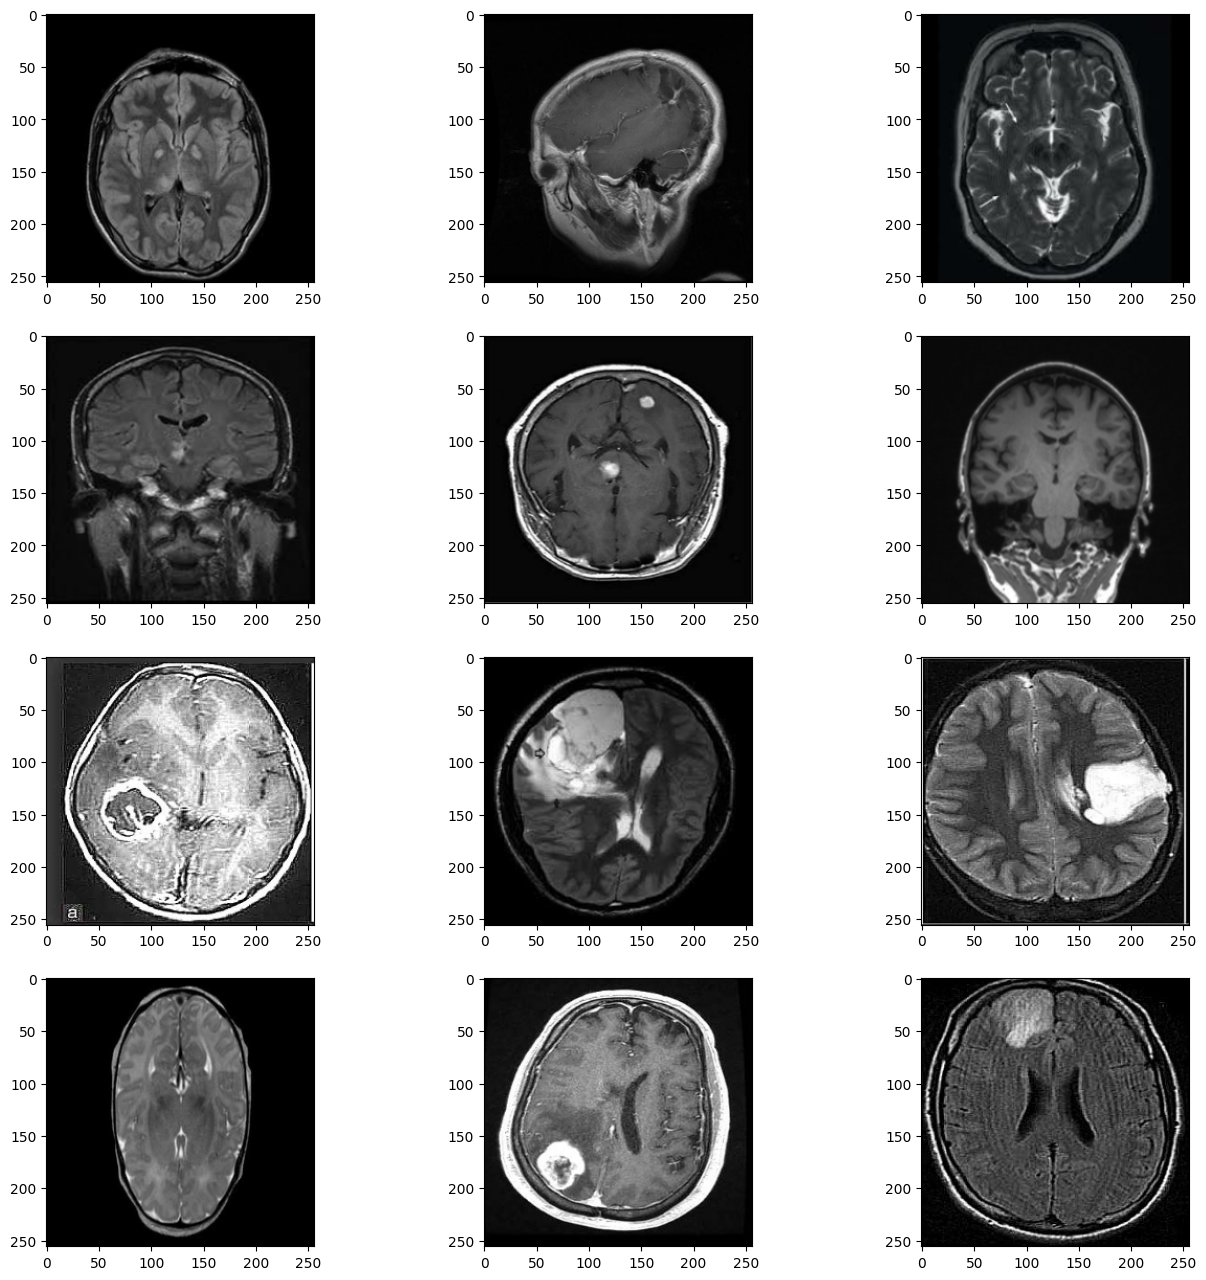

In [83]:
plot_images(valid)

In [87]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical', input_shape=(256, 256, 3)),
    layers.RandomContrast(factor=0.2),
    layers.RandomBrightness(factor=0.2),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 256, 256, 3)      0         
 rast)                                                           
                                                                 
 random_brightness (RandomBr  (None, 256, 256, 3)      0         
 ightness)                                                       
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0

In [89]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [90]:
EPOCHS = 20

history = model.fit(train,
                    epochs=EPOCHS, 
                    validation_data=valid)

Epoch 1/20
90/90 [==============================] - 44s 379ms/step - loss: 0.6468 - accuracy: 0.7314 - val_loss: 0.4021 - val_accuracy: 0.8456
Epoch 2/20
90/90 [==============================] - 33s 368ms/step - loss: 0.3014 - accuracy: 0.8754 - val_loss: 0.2957 - val_accuracy: 0.8885
Epoch 3/20
90/90 [==============================] - 33s 370ms/step - loss: 0.1900 - accuracy: 0.9282 - val_loss: 0.2153 - val_accuracy: 0.9363
Epoch 4/20
90/90 [==============================] - 33s 370ms/step - loss: 0.0989 - accuracy: 0.9650 - val_loss: 0.2282 - val_accuracy: 0.9363
Epoch 5/20
90/90 [==============================] - 33s 367ms/step - loss: 0.0768 - accuracy: 0.9737 - val_loss: 0.2264 - val_accuracy: 0.9473
Epoch 6/20
90/90 [==============================] - 33s 367ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.2557 - val_accuracy: 0.9436
Epoch 7/20
90/90 [==============================] - 33s 367ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.2499 - val_accuracy: 0.9547

In [91]:
def validation_and_accuracy_graphs(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

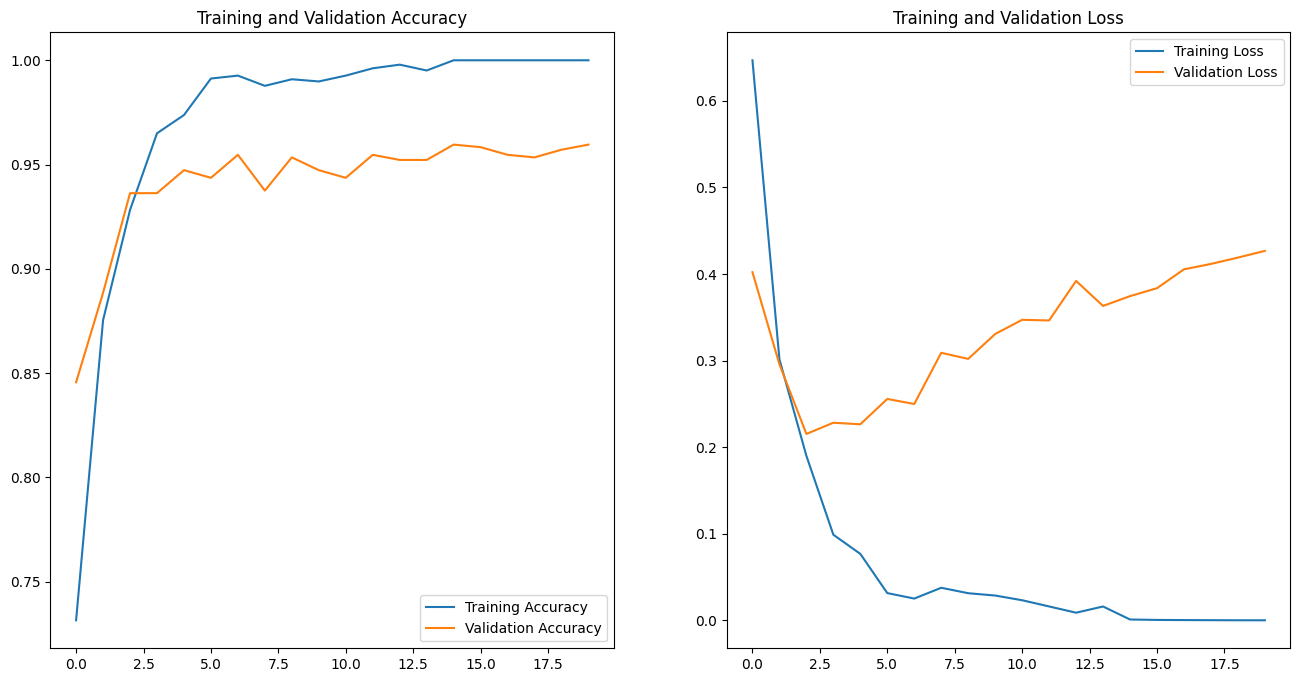

In [93]:
validation_and_accuracy_graphs(history, EPOCHS)

In [129]:
loss, accuracy = model.evaluate(test)

13/13 [==============================] - 1s 35ms/step - loss: 0.2373 - accuracy: 0.9657


In [130]:
print("Brain tumor recognition accuracy : ", accuracy)

Brain tumor recognition accuracy :  0.9656862616539001
